In [1]:
############# Info
# SparkContext available as sc, HiveContext available as sqlContext.

In [ ]:
############# Creating Hive table on the HBase table from SparkSQL
sqlContext.sql("DROP TABLE IF EXISTS TweetsLocation")
sqlContext.sql("CREATE EXTERNAL TABLE TweetsLocation(id string COMMENT 'from deserializer', states string COMMENT 'from deserializer', values string COMMENT 'from deserializer')  ROW FORMAT SERDE 'org.apache.hadoop.hive.hbase.HBaseSerDe' STORED BY 'org.apache.hadoop.hive.hbase.HBaseStorageHandler' WITH SERDEPROPERTIES ('hbase.columns.mapping'=':key,information:states,information:values', 'serialization.format'='1') TBLPROPERTIES ('hbase.table.name'='TweetsLocation')")

In [2]:
############# Imports
from lightning import Lightning
import time
import numpy as np

In [44]:
############# Logic
df = sqlContext.sql("select states, values from TweetsLocation")
rdd_states = df.map(lambda p: p.states)
rdd_values = df.map(lambda p: p.values)
lst_states = rdd_states.collect()
lst_values = rdd_values.collect()


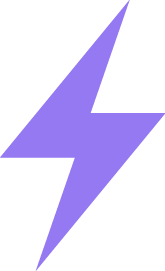

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
done :)


In [46]:
############# Visualization
lgn = Lightning(ipython=True)
lgn.use_session('0f47b269-5ce0-40a3-899a-c3bbb2fac888')

x = 0
while(x < 20):
    print("updating...")
    states = (lst_states[x]).split(',')
    values = (np.array((lst_values[x]).split(','))).astype(np.float)
    viz = lgn.map(states, values, colormap='Greens')
    viz
    time.sleep(2)
    x = x + 1
print('done :)')

In [17]:
############# From Twitter
df2 = sqlContext.sql("SELECT state.code AS states, count(tweet.id) AS values FROM hb_tweet AS tweet join state  AS state on (tweet.location = state.name) group by state.code")
rdd_states2 = df2.map(lambda p: p.states)
rdd_values2 = df2.map(lambda p: p.values)
lst_states2 = rdd_states2.collect()
lst_values2 = rdd_values2.collect()

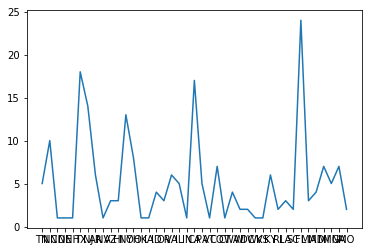

In [18]:
############# From Twitter
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(lst_states2, lst_values2)


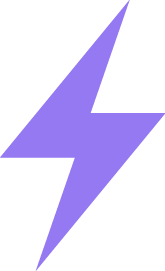

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [33]:
############# From Twitter
lgn2 = Lightning(ipython=True)
lgn2.use_session('4c4cfea9-c6fd-4e9f-ab66-76374906e4e3')

states2 = lst_states2
values2 = (np.array(lst_values2)).astype(np.float)
values2 /= np.max(np.abs(values2), axis=0)

viz2 = lgn2.map(states2, values2, colormap='Greens')
viz2


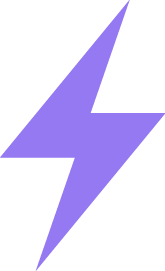

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
updating...
done :)


In [43]:
############# From Twitter Streaming
lgn3 = Lightning(ipython=True)
lgn3.use_session('ff30533e-0648-4eed-97df-945265bcf534')

y = 0
while(y < 20):
    print("updating...")
    
    # get the new data
    df3 = sqlContext.sql("SELECT state.code AS states, count(tweet.id) AS values FROM (SELECT hb_tweet.location AS location, hb_tweet.id FROM hb_tweet SORT BY hb_tweet.id DESC LIMIT 100) AS tweet JOIN state AS state ON (tweet.location = state.name) GROUP BY state.code")
    rdd_states3 = df3.map(lambda p: p.states)
    rdd_values3 = df3.map(lambda p: p.values)
    lst_states3 = rdd_states3.collect()
    lst_values3 = rdd_values3.collect()
    
    # display the new data
    states3 = lst_states3
    values3 = (np.array(lst_values3)).astype(np.float)
    values3 /= np.max(np.abs(values3), axis=0)

    viz3 = lgn3.map(states3, values3, colormap='Greens')
    viz3
    time.sleep(5)
    y = y + 1
print('done :)')